In [48]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the files

In [3]:
with open('receipts.json', 'r') as file:
    receipts = json.load(file)

receipts = pd.json_normalize(receipts)

In [4]:
receipts.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,1.609632e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
2,5.0,All-receipts receipt bonus,5,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,1609687537000,NaN,1609687542000,NaN,1.609632e+12
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,1.609632e+12
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,1.609601e+12


In [5]:
with open('users.json', 'r') as file:
    users = json.load(file)

users = pd.json_normalize(users)

In [6]:
users.head()

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,1609687530554,1.609688e+12
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12


In [7]:
with open('brands.json', 'r') as file:
    brands = json.load(file)

brands = pd.json_normalize(brands)

In [8]:
brands.head()

,barcode,category,categoryCode,name,topBrand,_id.$oid,cpg.$id.$oid,cpg.$ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827


## Check for missing values

In [9]:
receipts.isnull().sum()

bonusPointsEarned          575
bonusPointsEarnedReason    575
pointsEarned               510
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
_id.$oid                     0
createDate.$date             0
dateScanned.$date            0
finishedDate.$date         551
modifyDate.$date             0
pointsAwardedDate.$date    582
purchaseDate.$date         448
dtype: int64

In [10]:
users.isna().sum()

active                0
role                  0
signUpSource         48
state                56
_id.$oid              0
createdDate.$date     0
lastLogin.$date      62
dtype: int64

In [11]:
brands.isnull().sum()

barcode           0
category        155
categoryCode    650
name              0
topBrand        612
_id.$oid          0
cpg.$id.$oid      0
cpg.$ref          0
brandCode       234
dtype: int64

### Analysis of Missing Values in Datasets

#### I. receipts.json
The receipts dataset exhibits a substantial amount of missing data, particularly concerning the items listed in each receipt. These gaps may lead to inaccuracies in assigning bonus points.

#### II. users.json
Although the users dataset does not have many missing values overall, there are gaps in the `lastLogin` date for some users. This lack of information hinders the ability to determine the active status of users.

#### III. brands.json
The brands dataset contains numerous missing fields such as `categoryCode`, `topBrand`, `brandCode`, and `category`. To address this issue, imputation methods can be employed to introduce new values wherever data is absent, ensuring completeness and accuracy in the dataset.

## Duplicate Rows

In [13]:
receipts[receipts.drop(columns=['rewardsReceiptItemList']).duplicated()]

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date


In [14]:
users[users.duplicated()]

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
5,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
8,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,1609687444800,1.609688e+12
...,...,...,...,...,...,...,...
490,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,1418998882381,1.614963e+12
491,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,1418998882381,1.614963e+12
492,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,1418998882381,1.614963e+12
493,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,1418998882381,1.614963e+12


In [15]:
brands[brands.duplicated()]

,barcode,category,categoryCode,name,topBrand,_id.$oid,cpg.$id.$oid,cpg.$ref,brandCode


### Review of duplicated values in datasets

#### I. receipts.json
The dataset does not contain any duplicated rows.

#### II. users.json
It appears that there are approximately 283 duplicate entries for user lists within the dataset. Addressing these duplicates is crucial to avoid complications during analysis, and they should be removed before storing the data in the database.

#### III. brands.json
No duplicate rows are present in the dataset.

## Checking data types

In [17]:
receipts.dtypes

bonusPointsEarned          float64
bonusPointsEarnedReason     object
pointsEarned                object
purchasedItemCount         float64
rewardsReceiptItemList      object
rewardsReceiptStatus        object
totalSpent                  object
userId                      object
_id.$oid                    object
createDate.$date             int64
dateScanned.$date            int64
finishedDate.$date         float64
modifyDate.$date             int64
pointsAwardedDate.$date    float64
purchaseDate.$date         float64
dtype: object

In [18]:
users.dtypes

active                  bool
role                  object
signUpSource          object
state                 object
_id.$oid              object
createdDate.$date      int64
lastLogin.$date      float64
dtype: object

In [19]:
brands.dtypes

barcode         object
category        object
categoryCode    object
name            object
topBrand        object
_id.$oid        object
cpg.$id.$oid    object
cpg.$ref        object
brandCode       object
dtype: object

### Review of data types in datasets

#### I. receipts.json
The dataset exhibits inconsistencies within specific fields. The `totalSpent` field should ideally be represented as a float variable to accurately reflect monetary values. Additionally, the date parameter, typically represented as an epoch time, should uniformly adopt an integer format. However, `finishedDate` and `purchaseDate` deviate from this standard by being represented as float variables.

#### II. users.json
In this context as well, the `lastLogin` date is recorded as a float value, rather than conforming to the expected integer timestamp format.

#### III. brands.json
The `topBrand` variable, as per the data description, is intended to be a boolean value. However, in the current dataset, it is represented as an object variable instead.

In [62]:
price_points = receipts[['totalSpent', 'bonusPointsEarned']].dropna()
price_points.totalSpent = pd.to_numeric(price_points.totalSpent)
price_points.bonusPointsEarned = pd.to_numeric(price_points.bonusPointsEarned)

In [63]:
price_points.head()

,totalSpent,bonusPointsEarned
0,26.0,500.0
1,11.0,150.0
2,10.0,5.0
3,28.0,5.0
4,1.0,5.0


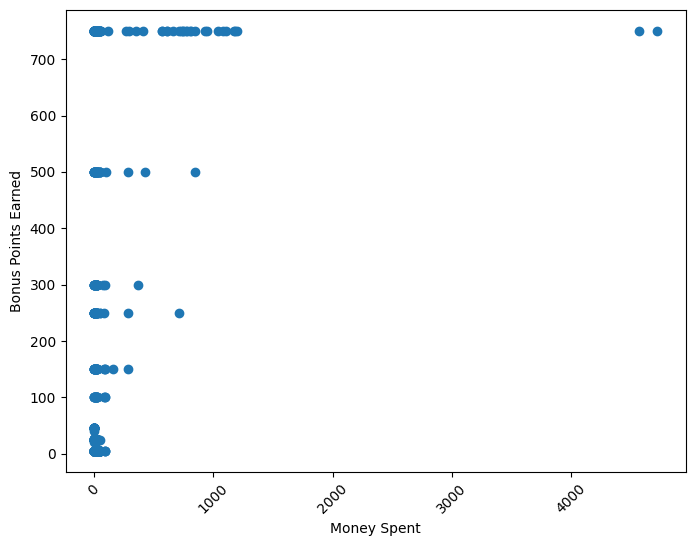

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(x=price_points.totalSpent, y=price_points.bonusPointsEarned)

# Add labels and title
plt.xlabel('Money Spent')
plt.ylabel('Bonus Points Earned')
# plt.title('Cumulative Points by User Over Time')
# plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
# plt.tight_layout()
plt.show()


The anticipated correlation between expenditure on a receipt and the corresponding bonus points granted is typically straightforward. However, upon examination of the scatter plot above, it becomes evident that certain receipts received significantly elevated bonus points despite low expenditure. This discrepancy poses a challenge for statistical analysis, as it lacks a clear rationale.